# Technical Support Data Analysis
## Hands On K-Means Clustering

### Loading the dataset

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics

import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split as tts
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [2]:
data = pd.read_csv('technical_support_data.csv')
data.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [3]:
data.shape

(23, 8)

In [4]:
data.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


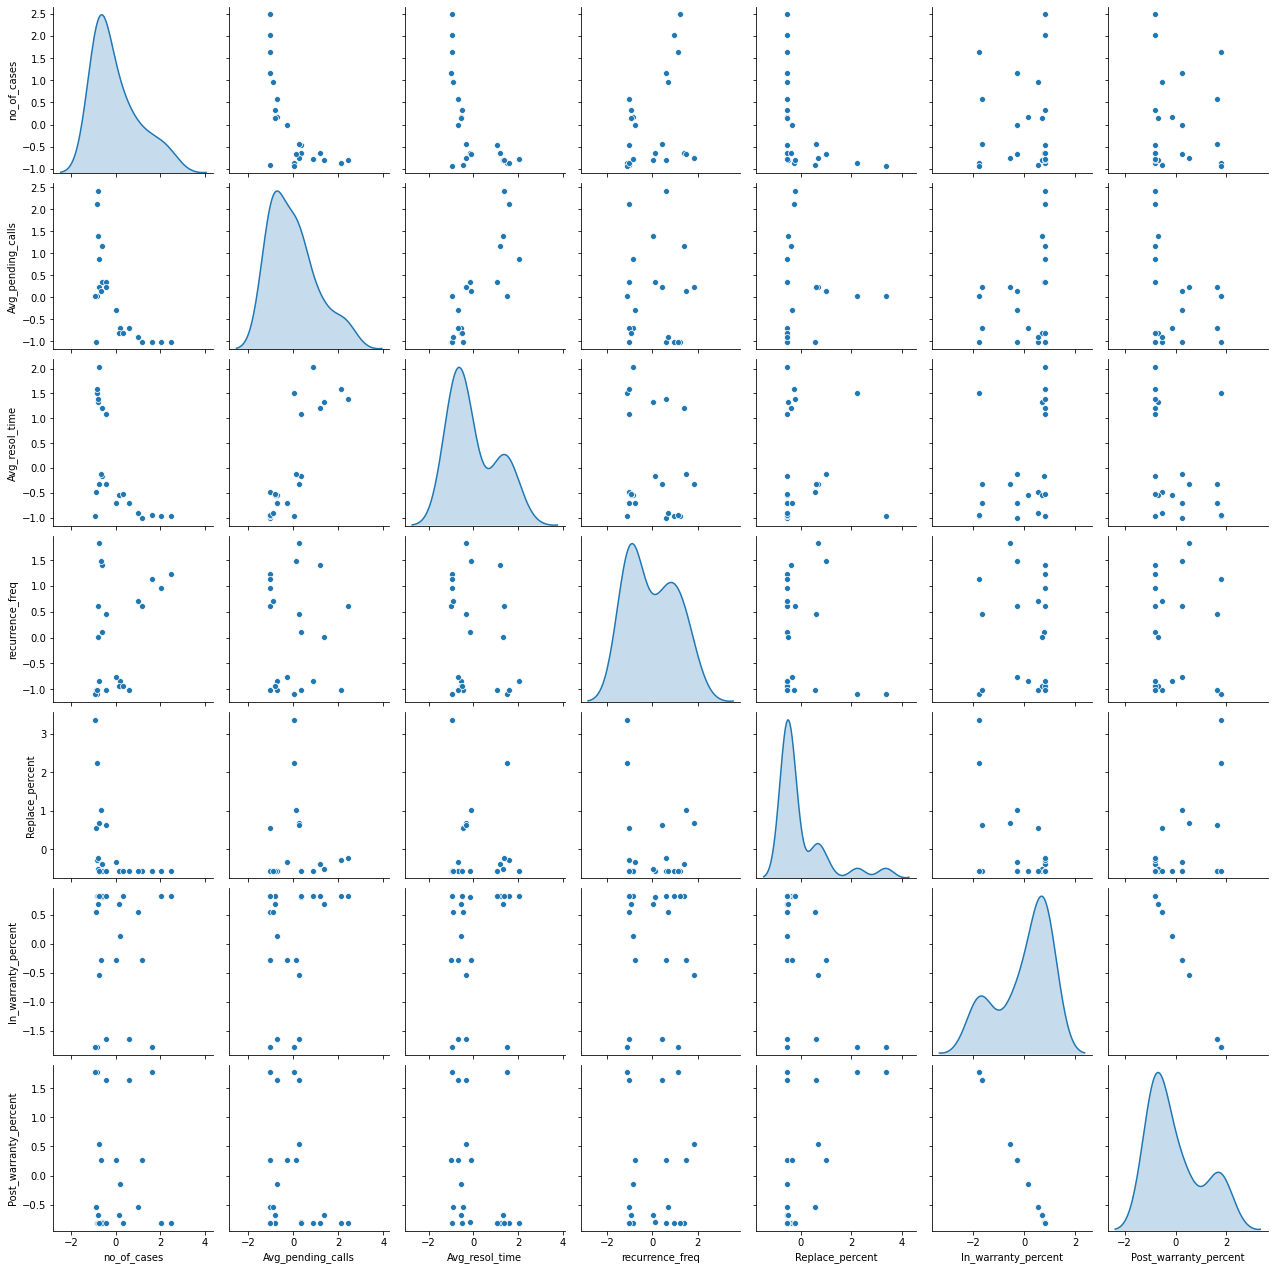

In [5]:
attr = data.iloc[:,1:]
scaled = attr.apply(zscore)
sns.pairplot(scaled, diag_kind='kde');

### Group data into similar clusters

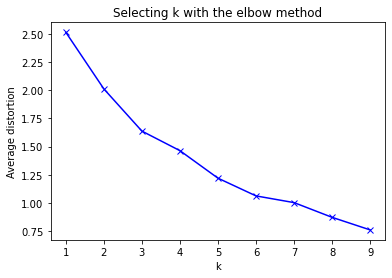

In [6]:
from scipy.spatial.distance import cdist

clusters = range(1,10)
mean_distortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled)
    prediction = model.predict(scaled)
    mean_distortions.append(sum(np.min(cdist(scaled, model.cluster_centers_, 'euclidean'), axis=1)) / scaled.shape[0])
    
plt.plot(clusters, mean_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the elbow method');

Bend is not very clear but might be 3 or 5

In [7]:
final_model = KMeans(3)
final_model.fit(scaled)
prediction = final_model.predict(scaled)

data['GROUP'] = prediction
scaled['GROUP'] = prediction

data.head()

Groups assigned: 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP3
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,2
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,0
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,2
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,0
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


In [8]:
scaled_clust = scaled.groupby(['GROUP'])
scaled_clust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP3,,,,,,,
0,-0.201991,-0.151228,-0.262973,0.240375,0.97053,-1.348020,1.348020
1,-0.710550,1.231151,1.208189,-0.104395,-0.44115,0.798984,-0.798984
2,0.709754,-0.839940,-0.735168,-0.105763,-0.41174,0.427028,-0.427028


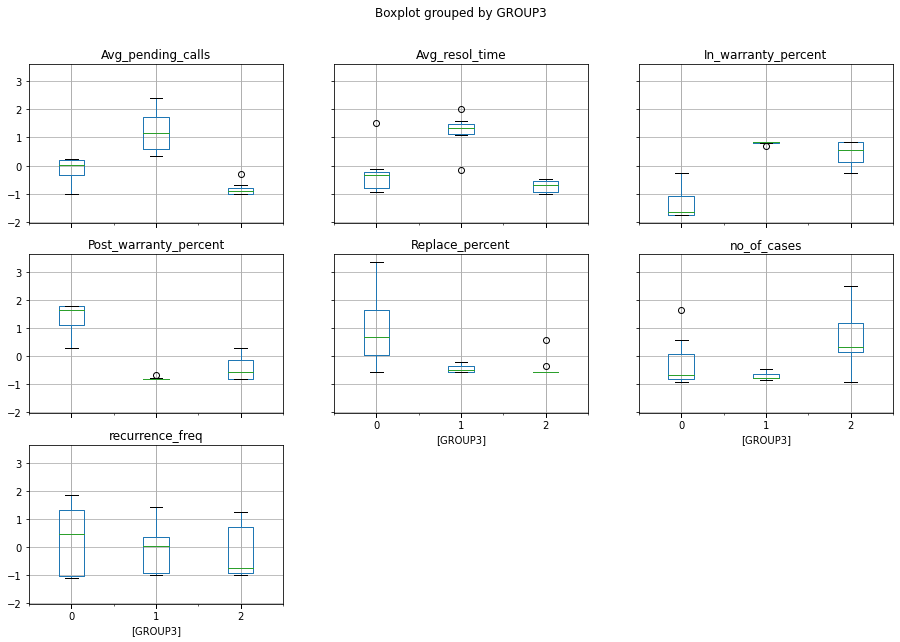

In [9]:
scaled.boxplot(by='GROUP', layout=(2,4), figsize=(15,10));

In [10]:
final_model = KMeans(5)
final_model.fit(scaled)
prediction = final_model.predict(scaled)

data['GROUP'] = prediction
scaled['GROUP'] = prediction

data.head()

Groups assigned: 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP3,GROUP5
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,2,3
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,0,4
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,2,3
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,0,4
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1,1


In [11]:
scaled_clust = scaled.groupby(['GROUP'])
scaled_clust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP3
GROUP5,,,,,,,,
0,0.073950,-0.222577,-0.479306,0.777232,0.235815,-1.175947,1.175947,0
1,-0.710550,1.231151,1.208189,-0.104395,-0.441150,0.798984,-0.798984,1
2,1.664375,-0.987344,-0.959481,0.880663,-0.561463,0.480258,-0.480258,2
3,-0.053943,-0.722017,-0.555718,-0.894903,-0.291961,0.384444,-0.384444,2
4,-0.891842,0.027143,0.277859,-1.101765,2.807317,-1.778204,1.778204,0


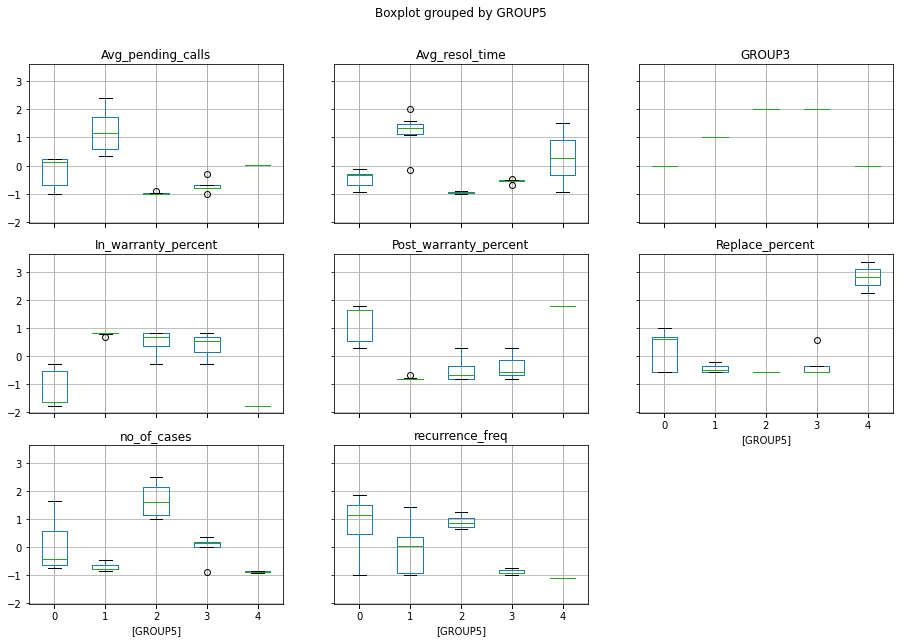

In [12]:
scaled.boxplot(by='GROUP', layout=(2,4), figsize=(15,10));